In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [0]:
import cifar10
cifar10.data_path = "data/CIFAR-10/"

In [0]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [0]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [0]:
images_train.shape

(50000, 32, 32, 3)

In [0]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

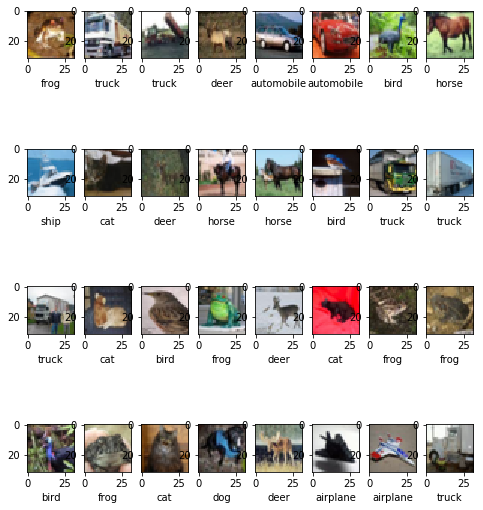

In [0]:
def print_images(no_of_images):
    fig = plt.figure(figsize=(8,8))
    for i in range(no_of_images):
        ax = fig.add_subplot(8, 8, i+1)
        plt.subplots_adjust(top=2)
        ax.imshow(images_train[i])
        ax.set_xlabel(class_names[cls_train[i]])
    plt.show()
print_images(32)

In [0]:
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [0]:
no_of_classes = len(class_names)
no_of_classes

10

In [0]:
IMAGE_SIZE = 32
CHANNELS = 3

In [0]:
model = cnn_model()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 96)        83040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 192)       166080    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 192)       331968    


In [0]:
checkpoint = ModelCheckpoint('best_model_simple.h5',
                            monitor='val_loss',
                            verbose=0,
                            save_best_only = True,
                            mode='auto')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=1.0e-4),
             metrics=['accuracy'])

In [0]:
model_details=model.fit(images_train, labels_train,
                       batch_size=128,
                       epochs=100,
                       validation_data=(images_test,labels_test),
                       callbacks=[checkpoint],
                       verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 32s 640us/step - loss: 0.0453 - acc: 0.9850 - val_loss: 0.8878 - val_acc: 0.8141
Epoch 2/100
 8576/50000 [====>.........................] - ETA: 24s - loss: 0.0475 - acc: 0.9846

KeyboardInterrupt: ignored

In [0]:
scores = model.evaluate(images_test,labels_test,verbose=0)
scores

[0.8785364572048188, 0.8138]

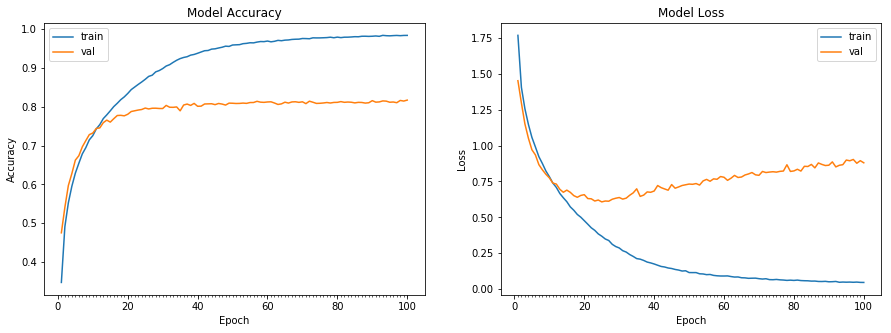

In [0]:
def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()
plot_model(model_details)

In [0]:
from skimage import io
import cv2

img  = io.imread("https://www.daf.co.uk/-/media/images/truck-configurator/background/backgroundvisual.jpg?mw=1200&hash=F0D7B9766E63F24BD21C1CF48EC70EF7BF6A1D70")
new_img = cv2.resize(img,(32,32))


In [0]:
new_img = new_img.reshape([1,32,32,3])
new_img.shape

(1, 32, 32, 3)

In [0]:
prediction = model.predict_classes(new_img)

In [0]:
class_names[prediction[0]]

'truck'

# Improving the accuracy


In [0]:
from keras.constraints import maxnorm
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

Augment the data

In [0]:
datagen = ImageDataGenerator(
    featurewise_center= False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(images_train)

In [0]:
augmented_model = cnn_model()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 96)        83040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 192)       166080    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 192)       331968    
___

In [0]:
augmented_checkpoint = ModelCheckpoint('augmented_best_model.h5',
                                      monitor='val_loss',
                                      verbose=0,
                                      save_best_only = True,
                                      mode='auto')

In [0]:
augmented_model.compile(loss='categorical_crossentropy',
                       optimizer=Adam(lr=1.0e-4),
                       metrics=['accuracy'])

In [0]:
augmented_model_details = augmented_model.fit_generator(datagen.flow(images_train, labels_train, batch_size=32),
                                                       steps_per_epoch=len(images_train)//32,
                                                       epochs=150,
                                                       validation_data=(images_test, labels_test),
                                                       callbacks=[augmented_checkpoint],
                                                       verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/150
 - 58s - loss: 1.8656 - acc: 0.3107 - val_loss: 1.4746 - val_acc: 0.4616
Epoch 2/150
 - 51s - loss: 1.6242 - acc: 0.4108 - val_loss: 1.4504 - val_acc: 0.4844
Epoch 3/150
 - 51s - loss: 1.4775 - acc: 0.4658 - val_loss: 1.2326 - val_acc: 0.5588
Epoch 4/150
 - 51s - loss: 1.3880 - acc: 0.4994 - val_loss: 1.1785 - val_acc: 0.5822
Epoch 5/150
 - 51s - loss: 1.3233 - acc: 0.5265 - val_loss: 1.1557 - val_acc: 0.5895
Epoch 6/150
 - 51s - loss: 1.2719 - acc: 0.5442 - val_loss: 1.0873 - val_acc: 0.6102
Epoch 7/150
 - 51s - loss: 1.2153 - acc: 0.5652 - val_loss: 1.0103 - val_acc: 0.6411
Epoch 8/150
 - 51s - loss: 1.1781 - acc: 0.5809 - val_loss: 1.0457 - val_acc: 0.6309
Epoch 9/150
 - 51s - loss: 1.1444 - acc: 0.5921 - val_loss: 1.1556 - val_acc: 0.5983
Epoch 10/150
 - 51s - loss: 1.1112 - acc: 0.6070 - val_loss: 1.0723 - val_acc: 0.6280
Epoch 11/150
 - 51s - loss: 1.0878 - acc: 0.6139 - val_

In [0]:
model_json = augmented_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
augmented_model.save_weights("model_weights.h5")
print("Saved model to drive")

Saved model to drive


In [0]:
from google.colab import files
files.download("model_weights.h5")